# SNCF lost objects data

In [1]:
import requests
import pandas as pd

In [2]:
def get_data(gares, year_start, year_end):
    data = list()
    for date in range(year_start, year_end+1):
        for gare in gares:
            gare = "+".join(gare.split())
            # print(gare, date)
            res = requests.get(f"https://ressources.data.sncf.com/api/records/1.0/search/?dataset=objets-trouves-restitution&q=lille&rows=10000&sort=date&facet=date&facet=gc_obo_date_heure_restitution_c&facet=gc_obo_gare_origine_r_name&facet=gc_obo_nature_c&facet=gc_obo_type_c&facet=gc_obo_nom_recordtype_sc_c&refine.gc_obo_gare_origine_r_name={gare}&refine.date={date}").json()
            
            for row in res["records"]:
                # print(row)
                # id = row["recordid"]
                # gare_origine_id = row["fields"]["gc_obo_gare_origine_r_code_uic_c"]
                gare_origine_nom = row["fields"]["gc_obo_gare_origine_r_name"]
                type_objet = row["fields"]["gc_obo_type_c"]
                objet = row["fields"]["gc_obo_nature_c"]
                # recordtype = row["fields"]["gc_obo_nom_recordtype_sc_c"]
                date_perdu = row["fields"]["date"]

                if "gc_obo_date_heure_restitution_c" in row["fields"].keys():
                    date_rendu = row["fields"]["gc_obo_date_heure_restitution_c"]
                    new_row = {#"id":id,
                                # "gare_origine_id":gare_origine_id,
                                "gare_origine_nom":gare_origine_nom,
                                "type_objet":type_objet,
                                "objet":objet,
                                # "recordtype":recordtype,
                                "date_perdu":date_perdu,
                                "date_rendu":date_rendu}
                    data.append(new_row)
                else :
                    new_row = {#"id":id,
                                # "gare_origine_id":gare_origine_id,
                                "gare_origine_nom":gare_origine_nom,
                                "type_objet":type_objet,
                                "objet":objet,
                                # "recordtype":recordtype,
                                "date_perdu":date_perdu}
                    data.append(new_row)

    return data

In [3]:
gares = ["Lille Flandres", "Lille Europe"]
year_start = 2016
year_end = 2023

In [4]:
data = get_data(gares=gares,
        year_start=year_start,
        year_end=year_end)

In [5]:
len(data)

22247

In [6]:
pd.DataFrame(data)#.drop(["id", "recordtype"], axis=1)


,gare_origine_nom,type_objet,objet,date_perdu,date_rendu
0,Lille Europe,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31T17:49:05+00:00,NaN
1,Lille Europe,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31T16:09:12+00:00,NaN
2,Lille Europe,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31T15:52:03+00:00,NaN
3,Lille Europe,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31T13:55:43+00:00,2017-01-02T10:20:06+00:00
4,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31T13:41:39+00:00,2017-01-23T12:03:06+00:00
...,...,...,...,...,...
22242,Lille Europe,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",2023-01-02T05:56:37+00:00,2023-01-02T16:07:54+00:00
22243,Lille Europe,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2023-01-01T17:28:30+00:00,NaN
22244,Lille Europe,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2023-01-01T14:58:24+00:00,NaN
22245,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2023-01-01T07:03:54+00:00,2023-01-01T07:11:10+00:00


# Temperature data

In [7]:

URL_METEO = """https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=lille
               &rows=10000&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=
               nom_reg&refine.nom=LILLE-LESQUIN&refine.date=2016"""


In [8]:
meteo = requests.get(URL_METEO).json()

In [9]:
len(meteo["records"])

2923

In [10]:
meteo["records"][0]#["fields"]["temps_present"]

{'datasetid': 'donnees-synop-essentielles-omm',
 'recordid': 'd3f944bc4b079f2b02dca1a4f637c7ec1e9ba50d',
 'fields': {'tminsolc': -1.1999999999999886,
  'rafper': 3.3,
  'code_dep': '59',
  'libgeo': 'Fretin',
  'pmer': 102520,
  'code_epci': '245900410',
  't': 271.55,
  'ww': '0',
  'ht_neige': 0.0,
  'numer_sta': '07015',
  'raf10': 2.4,
  'code_reg': '32',
  'codegeo': '59256',
  'rr3': 0.0,
  'etat_sol': '5',
  'coordonnees': [50.57, 3.0975],
  'rr12': 0.0,
  'rr6': 0.0,
  'tc': -1.599999999999966,
  'tminsol': 271.95,
  'rr24': 0.0,
  'per': -10.0,
  'nom_dept': 'Nord',
  'mois_de_l_annee': 3,
  'nom_reg': 'Hauts-de-France',
  'td': 270.45,
  'longitude': 3.0975,
  'temps_present': 'On n’a pas observé d’évolution des nuages ou on n’a pas pu suivre cette évolution',
  'ff': 2.1,
  'tend24': 290.0,
  'altitude': 47,
  'dd': 300,
  'nom_epci': 'Métropole Européenne de Lille',
  'rr1': 0.0,
  'date': '2016-03-01T00:00:00+00:00',
  'nom': 'LILLE-LESQUIN',
  'u': 92,
  'type_de_tendance

In [11]:
def get_meteo_data(year_start, year_end):
    data = list()
    for date in range(year_start, year_end+1):
        res = requests.get(f"https://public.opendatasoft.com/api/records/1.0/search/?dataset=donnees-synop-essentielles-omm&q=lille&rows=10000&facet=date&facet=nom&facet=temps_present&facet=libgeo&facet=nom_epci&facet=nom_dept&facet=nom_reg&refine.nom=LILLE-LESQUIN&refine.date={date}").json()
            
        for row in res["records"]:
            # print(row)
            id = row["recordid"]
            temperatureK = row["fields"]["t"]
            # climat = row["fields"]["temps_present"]
            humidite = row["fields"]["u"]
            # vent_mps = row["fields"]["ff"]
            # pression_station = row["fields"]["pres"]
            # pression_mer = row["fields"]["pmer"]
            zone = row["fields"]["nom"]
            # coordonnees = row["fields"]["coordonnees"]
            ville_ref = row["fields"]["libgeo"]
            date = row["fields"]["date"]

            new_row = {"id":id,
                        "temperatureK":temperatureK,
                        # "climat":climat,
                        "humidite":humidite,
                        # "vent_mps":vent_mps,
                        # "pression_station":pression_station,
                        # "pression_mer":pression_mer,
                        "zone":zone,
                        # "coordonnees":coordonnees,
                        "ville_ref":ville_ref,
                        "date":date}
            data.append(new_row)

    return data

In [12]:
year_start = 2016
year_end = 2023

In [13]:
meteo_data = get_meteo_data(year_start=year_start,
                           year_end=year_end)

In [14]:
len(meteo_data)

20463

In [15]:
pd.DataFrame(meteo_data)

,id,temperatureK,humidite,zone,ville_ref,date
0,d3f944bc4b079f2b02dca1a4f637c7ec1e9ba50d,271.55,92,LILLE-LESQUIN,Fretin,2016-03-01T00:00:00+00:00
1,8ffcaa7b30714d6cf6513882866ea2a2fa1fdc19,274.75,94,LILLE-LESQUIN,Fretin,2016-03-07T03:00:00+00:00
2,92343abcbb6a0a6ce296054368ba4d2c5a4984b2,279.75,66,LILLE-LESQUIN,Fretin,2016-03-08T12:00:00+00:00
3,104003b321ce2861354f97114c1da7fbaf4833b8,283.25,52,LILLE-LESQUIN,Fretin,2016-03-11T15:00:00+00:00
4,45a2d1bcbc7df6a1c94a79ebf01196ed1397df06,278.25,65,LILLE-LESQUIN,Fretin,2016-03-17T09:00:00+00:00
...,...,...,...,...,...,...
20458,93bc6b8ff4f0b631592c680f0eb0980f4ca1d3b4,285.05,88,LILLE-LESQUIN,Fretin,2023-01-01T15:00:00+00:00
20459,11342feab99cc283851987a6b62e75f7c03516bb,285.35,92,LILLE-LESQUIN,Fretin,2023-01-05T12:00:00+00:00
20460,170bb875d1d120f1faa6bc9340e71a9fefb4d747,286.85,67,LILLE-LESQUIN,Fretin,2023-01-01T03:00:00+00:00
20461,33eff8e6eaa6cfe6a7402a4481a8a616a2dfe757,284.65,90,LILLE-LESQUIN,Fretin,2023-01-05T18:00:00+00:00


# Write data to a SQlite BDD with sqlalchemy

In [16]:
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, Float, String, Boolean, SmallInteger, CheckConstraint

In [17]:
engine = create_engine('sqlite:///db.sqlite')
Base = declarative_base()

class ObjetTrouve(Base):
    __tablename__ = "ObjetTrouve"

    id = Column(Integer, primary_key=True)
    gare_origine_nom = Column(String)
    type_objet = Column(String)
    objet = Column(String)
    date_perdu = Column(String)
    date_rendu = Column(String)

class Meteo(Base):
    __tablename__ = "Meteo"

    id = Column(Integer, primary_key=True)
    temperatureK = Column(Float)
    humidite = Column(Float)
    zone = Column(String)
    # coordonnees = Column(String)
    ville_ref = Column(String)
    date = Column(String)

Base.metadata.create_all(engine)

In [18]:
# vider la table ObjetTrouve
from sqlalchemy.orm import sessionmaker

Session = sessionmaker(bind=engine)
session = Session()
session.query(ObjetTrouve).delete()
session.commit()

In [19]:
from sqlalchemy.orm import sessionmaker

Session = sessionmaker(bind=engine)
session = Session()

for row in data:
    session.add(ObjetTrouve(gare_origine_nom = row["gare_origine_nom"],
                            type_objet = row["type_objet"],
                            objet = row["objet"],
                            date_perdu = row["date_perdu"],
                            date_rendu = row.get("date_rendu")
                            ))

session.commit()

In [20]:
for row in session.query(ObjetTrouve).filter(ObjetTrouve.type_objet == "Porte-monnaie / portefeuille, argent, titres").all():
    print(row.objet, row.date_perdu)


Chéquier 2016-12-31T17:49:05+00:00
Porte-monnaie, portefeuille 2016-12-31T09:38:23+00:00
Porte-monnaie, portefeuille 2016-12-29T13:37:40+00:00
Carte de crédit 2016-12-29T12:38:39+00:00
Carte de crédit 2016-12-28T11:05:09+00:00
Porte-monnaie, portefeuille 2016-12-27T07:53:33+00:00
Carte de crédit 2016-12-27T06:33:33+00:00
Porte-monnaie, portefeuille 2016-12-23T11:30:24+00:00
Porte-monnaie, portefeuille 2016-12-22T07:40:33+00:00
Porte-monnaie, portefeuille 2016-12-20T07:43:03+00:00
Porte-monnaie, portefeuille 2016-12-19T10:28:21+00:00
Porte-monnaie, portefeuille 2016-12-19T10:07:19+00:00
Carte de crédit 2016-12-19T09:16:49+00:00
Carte de crédit 2016-12-18T11:17:13+00:00
Porte-monnaie, portefeuille 2016-12-18T09:56:12+00:00
Carte de crédit 2016-12-17T10:46:41+00:00
Porte-monnaie, portefeuille 2016-12-17T08:44:22+00:00
Autre argent 2016-12-16T15:28:15+00:00
Porte-monnaie, portefeuille 2016-12-16T09:40:37+00:00
Porte-monnaie, portefeuille 2016-12-15T10:47:39+00:00
Carte de crédit 2016-12-15

In [21]:
from sqlalchemy.orm import sessionmaker

Session = sessionmaker(bind=engine)
session = Session()


for row in data:
    session.add(ObjetTrouve(gare_origine_nom = row.get("gare_origine_nom"),
                            type_objet =  row.get("type_objet"),
                            objet =  row.get("objet"),
                            date_perdu =  row.get("date_perdu"),
                            date_rendu = row.get("date_rendu")
                            ))

for row in meteo_data:
    session.add(Meteo(temperatureK =  row.get("temperatureK"),
                            humidite =  row.get("humidite"),
                            zone =  row.get("zone"),
                            # coordonnees =  row.get("coordonnees"),
                            ville_ref =  row.get("ville_ref"),
                            date = row.get("date")
                            ))

session.commit()

# First analysis

## Lost objects data

### Load data

In [22]:
engine = create_engine('sqlite:///db_sncf.sqlite')


Session = sessionmaker(bind=engine)
session = Session()

In [23]:
lost_objects_data = list()
for row in session.query(ObjetTrouve):

    new_row = {"gare_origine_nom":row.gare_origine_nom, 
               "type_objet":row.type_objet,
               "objet":row.objet, 
               "date_perdu":row.date_perdu, 
               "date_rendu":row.date_rendu}

    lost_objects_data.append(new_row)



In [24]:
df = pd.DataFrame(lost_objects_data)
df

,gare_origine_nom,type_objet,objet,date_perdu,date_rendu
0,Lille Europe,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31T17:49:05+00:00,None
1,Lille Europe,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31T16:09:12+00:00,None
2,Lille Europe,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31T15:52:03+00:00,None
3,Lille Europe,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31T13:55:43+00:00,2017-01-02T10:20:06+00:00
4,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31T13:41:39+00:00,2017-01-23T12:03:06+00:00
...,...,...,...,...,...
22217,Lille Europe,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",2023-01-02T05:56:37+00:00,None
22218,Lille Europe,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",2023-01-01T17:28:30+00:00,None
22219,Lille Europe,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",2023-01-01T14:58:24+00:00,None
22220,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2023-01-01T07:03:54+00:00,2023-01-01T07:11:10+00:00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22222 entries, 0 to 22221
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gare_origine_nom  22222 non-null  object
 1   type_objet        22222 non-null  object
 2   objet             22222 non-null  object
 3   date_perdu        22222 non-null  object
 4   date_rendu        7928 non-null   object
dtypes: object(5)
memory usage: 868.2+ KB


In [26]:
df.iloc[0, 3]

'2016-12-31T17:49:05+00:00'

### Taking care of dates

In [27]:
from datetime import datetime

datetime.fromisoformat("2016-12-31T17:49:05+00:00").year

2016

In [28]:
df["date_perdu"] = pd.to_datetime(df["date_perdu"])
df["date_rendu"] = pd.to_datetime(df["date_rendu"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22222 entries, 0 to 22221
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   gare_origine_nom  22222 non-null  object             
 1   type_objet        22222 non-null  object             
 2   objet             22222 non-null  object             
 3   date_perdu        22222 non-null  datetime64[ns, UTC]
 4   date_rendu        7928 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), object(3)
memory usage: 868.2+ KB


In [29]:
df.head()

,gare_origine_nom,type_objet,objet,date_perdu,date_rendu
0,Lille Europe,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31 17:49:05+00:00,NaT
1,Lille Europe,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31 16:09:12+00:00,NaT
2,Lille Europe,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31 15:52:03+00:00,NaT
3,Lille Europe,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31 13:55:43+00:00,2017-01-02 10:20:06+00:00
4,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31 13:41:39+00:00,2017-01-23 12:03:06+00:00


In [30]:
import calendar

annee = list()
mois = list()
semaine_num = list()
jour_numero = list()
jour_nom = list()

for date in df["date_perdu"].to_list():
    annee.append(date.year)
    mois.append(date.month)
    semaine_num.append(date.isocalendar()[1])
    jour_numero.append(date.day)
    jour_nom.append(calendar.day_name[date.weekday()])

In [31]:
df["annee"] = annee
df["mois"] = mois
df["semaine_num"] = semaine_num
df["jour_numero"] = jour_numero
df["jour_nom"] = jour_nom
df.head()

,gare_origine_nom,type_objet,objet,date_perdu,date_rendu,annee,mois,semaine_num,jour_numero,jour_nom
0,Lille Europe,"Porte-monnaie / portefeuille, argent, titres",Chéquier,2016-12-31 17:49:05+00:00,NaT,2016,12,52,31,Saturday
1,Lille Europe,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",2016-12-31 16:09:12+00:00,NaT,2016,12,52,31,Saturday
2,Lille Europe,Pièces d'identités et papiers personnels,Carte Vitale,2016-12-31 15:52:03+00:00,NaT,2016,12,52,31,Saturday
3,Lille Europe,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2016-12-31 13:55:43+00:00,2017-01-02 10:20:06+00:00,2016,12,52,31,Saturday
4,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2016-12-31 13:41:39+00:00,2017-01-23 12:03:06+00:00,2016,12,52,31,Saturday


### Set index on date column

In [32]:
df = df.set_index("date_perdu")
df

,gare_origine_nom,type_objet,objet,date_rendu,annee,mois,semaine_num,jour_numero,jour_nom
date_perdu,,,,,,,,,
2016-12-31 17:49:05+00:00,Lille Europe,"Porte-monnaie / portefeuille, argent, titres",Chéquier,NaT,2016,12,52,31,Saturday
2016-12-31 16:09:12+00:00,Lille Europe,"Appareils électroniques, informatiques, appare...","Tablette tactile protégée (étui, housse)",NaT,2016,12,52,31,Saturday
2016-12-31 15:52:03+00:00,Lille Europe,Pièces d'identités et papiers personnels,Carte Vitale,NaT,2016,12,52,31,Saturday
2016-12-31 13:55:43+00:00,Lille Europe,"Bagagerie: sacs, valises, cartables","Valise, sac sur roulettes",2017-01-02 10:20:06+00:00,2016,12,52,31,Saturday
2016-12-31 13:41:39+00:00,Lille Europe,"Bagagerie: sacs, valises, cartables",Sac à main,2017-01-23 12:03:06+00:00,2016,12,52,31,Saturday
...,...,...,...,...,...,...,...,...,...
2023-01-02 05:56:37+00:00,Lille Europe,"Appareils électroniques, informatiques, appare...","Téléphone portable protégé (étui, coque,…)",NaT,2023,1,1,2,Monday
2023-01-01 17:28:30+00:00,Lille Europe,Pièces d'identités et papiers personnels,"Carte d'identité, passeport, permis de conduire",NaT,2023,1,52,1,Sunday
2023-01-01 14:58:24+00:00,Lille Europe,"Appareils électroniques, informatiques, appare...","AirPod, casque audio, écouteurs",NaT,2023,1,52,1,Sunday


### Analysis

In [33]:
df["date"] = df.index.date
df["date"] = pd.to_datetime(df["date"] )
df_count = df.groupby(["date"]).agg("count")["objet"]
df_count = pd.DataFrame(df_count)
df_count.index = pd.to_datetime(df_count.index)

df_count.head()

,objet
date,
2016-01-01,1
2016-01-02,8
2016-01-03,8
2016-01-04,12
2016-01-05,4


In [34]:

annee = []
mois = []
semaine_num = []
jour_numero = []
jour_nom = []

for date in df_count.index:
    annee.append(date.year)
    mois.append(date.month)
    semaine_num.append(date.isocalendar()[1])
    jour_numero.append(date.day)
    jour_nom.append(calendar.day_name[date.weekday()])

df_count["annee"] = annee
df_count["mois"] = mois
df_count["semaine_num"] = semaine_num
df_count["jour_numero"] = jour_numero
df_count["jour_nom"] = jour_nom
df_count.head()

,objet,annee,mois,semaine_num,jour_numero,jour_nom
date,,,,,,
2016-01-01,1,2016,1,53,1,Friday
2016-01-02,8,2016,1,53,2,Saturday
2016-01-03,8,2016,1,53,3,Sunday
2016-01-04,12,2016,1,1,4,Monday
2016-01-05,4,2016,1,1,5,Tuesday


#### Moyenne objets perdus

##### Par mois

In [35]:
df_count.groupby("mois").mean()["objet"]

mois
1      8.506912
2      8.877551
3      8.452736
4      8.572222
5      8.505000
6     10.010050
7      9.957746
8      8.657407
9     10.158654
10     9.827103
11     8.859296
12     8.402913
Name: objet, dtype: float64

##### Par jour de semaine

In [36]:
df_count.groupby("jour_nom").mean()["objet"]

jour_nom
Friday        9.190202
Monday       11.256983
Saturday      8.945087
Sunday        7.230548
Thursday      9.461972
Tuesday       8.988506
Wednesday     8.367816
Name: objet, dtype: float64

#### Somme des objets perdus entre  2016 et 2022

##### Par jour

In [37]:
df_count["objet"]

date
2016-01-01     1
2016-01-02     8
2016-01-03     8
2016-01-04    12
2016-01-05     4
              ..
2022-12-29    13
2022-12-30    10
2022-12-31     5
2023-01-01     4
2023-01-02     9
Name: objet, Length: 2449, dtype: int64

##### Par semaine

In [38]:
df_count.groupby("semaine_num").agg("sum")["objet"]

semaine_num
1     418
2     405
3     412
4     412
5     445
6     437
7     433
8     433
9     400
10    431
11    395
12    344
13    372
14    327
15    390
16    364
17    358
18    328
19    412
20    377
21    416
22    437
23    441
24    429
25    441
26    518
27    497
28    495
29    524
30    451
31    406
32    381
33    379
34    450
35    431
36    561
37    468
38    517
39    484
40    471
41    477
42    514
43    465
44    395
45    431
46    403
47    412
48    460
49    394
50    408
51    386
52    339
53     48
Name: objet, dtype: int64

##### Par mois

In [39]:
df_count.groupby("mois").agg("sum")["objet"]


mois
1     1846
2     1740
3     1699
4     1543
5     1701
6     1992
7     2121
8     1870
9     2113
10    2103
11    1763
12    1731
Name: objet, dtype: int64

##### Par an

In [40]:
df_count.groupby("annee").agg("sum")["objet"]

annee
2016    4131
2017    4623
2018    4364
2019    3005
2020    1526
2021    1915
2022    2645
2023      13
Name: objet, dtype: int64

#### Boxplot

<AxesSubplot:xlabel='date', ylabel='objet'>

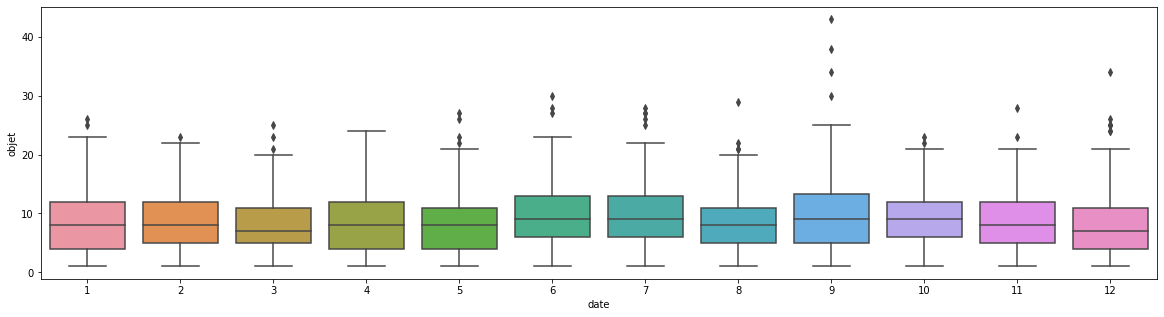

In [41]:
import matplotlib.pyplot as plt
import seaborn

fig, ax = plt.subplots(figsize=(20,5))
seaborn.boxplot(x = df_count.index.month, 
                y = df_count.objet, 
                ax = ax)

<AxesSubplot:xlabel='mois', ylabel='objet'>

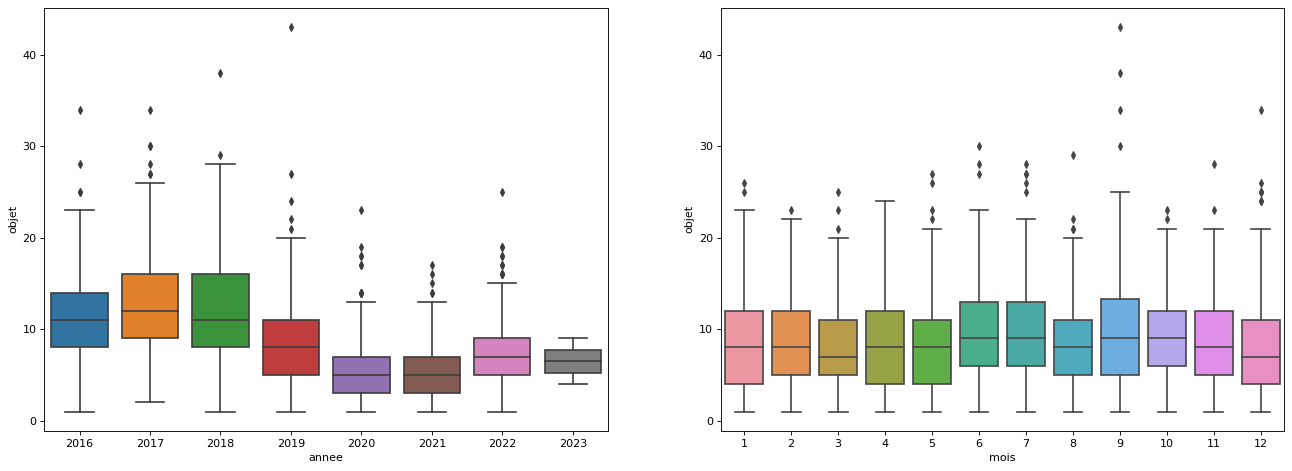

In [42]:
import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='annee', y='objet', data=df_count, ax=axes[0])
sns.boxplot(x='mois', y='objet', data=df_count)


<AxesSubplot:xlabel='semaine_num', ylabel='objet'>

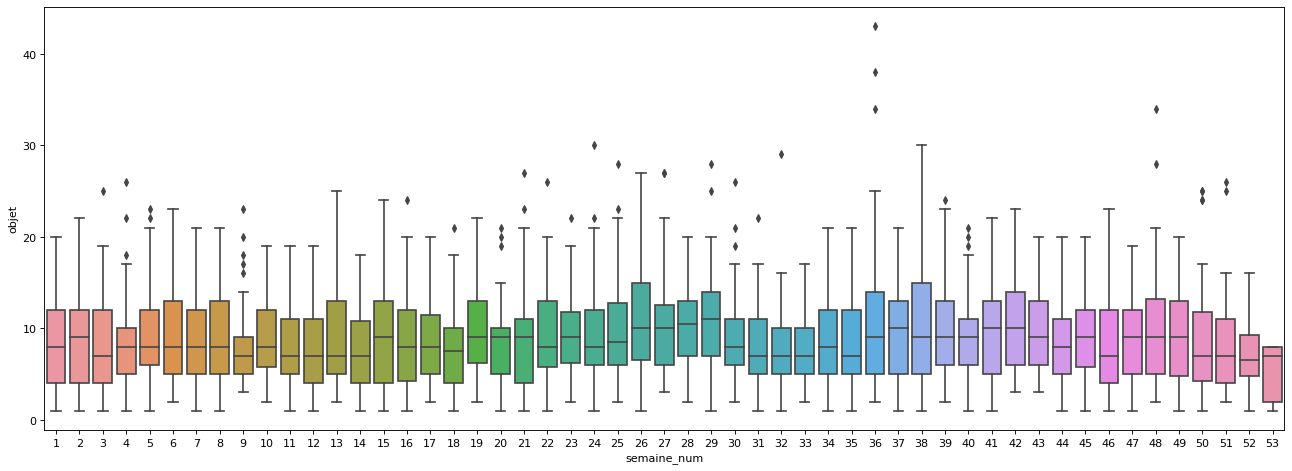

In [43]:
fig, axes = plt.subplots(figsize=(20,7), dpi= 80)
sns.boxplot(x='semaine_num', y='objet', data=df_count)

<AxesSubplot:xlabel='jour_nom', ylabel='objet'>

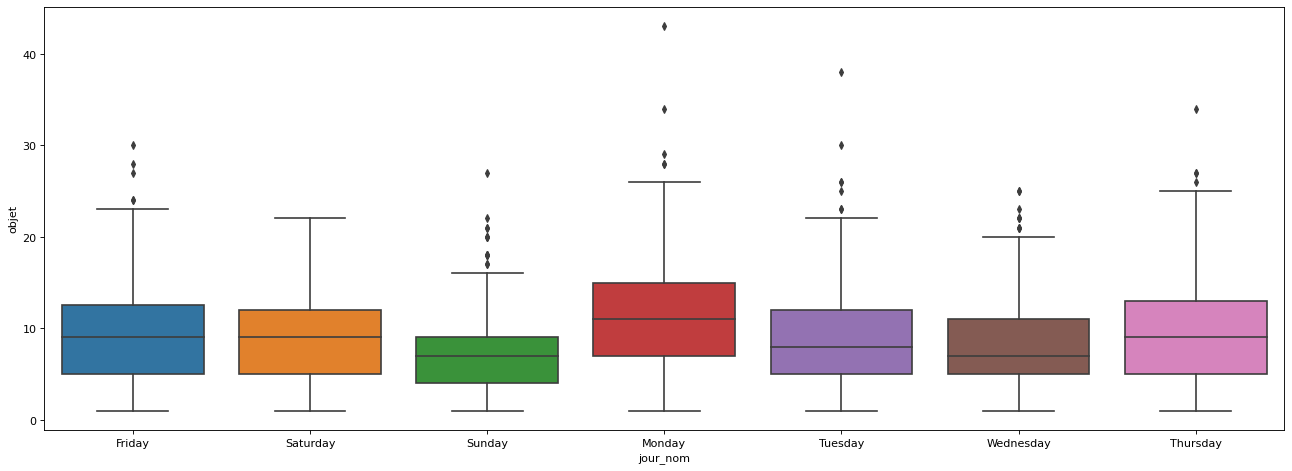

In [44]:
fig, axes = plt.subplots(figsize=(20,7), dpi= 80)
sns.boxplot(x='jour_nom', y='objet', data=df_count)

# Qualifier les données en vue du forecasting

<AxesSubplot:xlabel='annee,mois'>

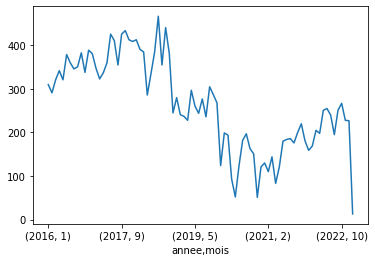

In [45]:
df_count.groupby(["annee","mois"]).agg("sum").objet.plot()

<AxesSubplot:xlabel='date'>

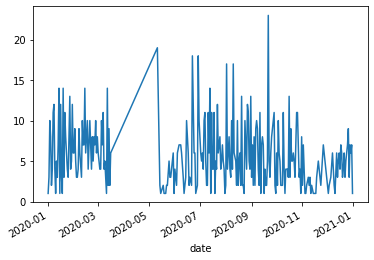

In [46]:
df_count.loc["2020"].objet.plot()

date
2016-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2018-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2019-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2020-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2021-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2022-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
2023-12-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: A-DEC, Name: objet, dtype: object

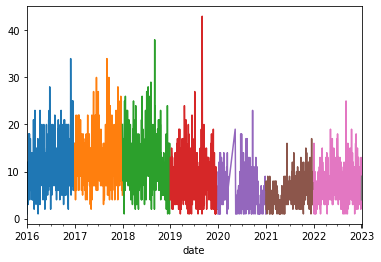

In [47]:
df_count["objet"].resample("Y").plot() # D jour, M mois, Y annee


<AxesSubplot:xlabel='date'>

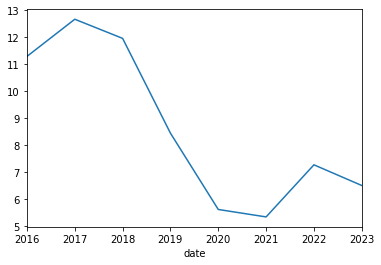

In [48]:
df_count["objet"].resample("Y").mean().plot()


<AxesSubplot:xlabel='date'>

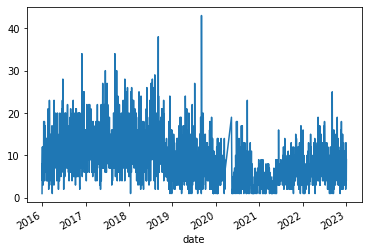

In [49]:
df_count["objet"].rolling(window="D",center=True, win_type=None).mean().plot()

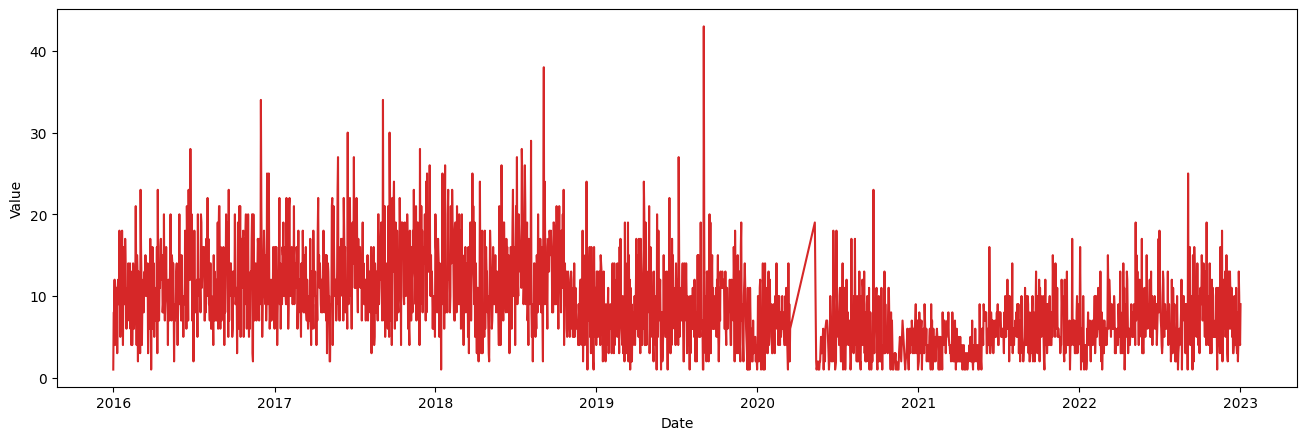

In [50]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df_count.index, y=df_count.objet, title='')    

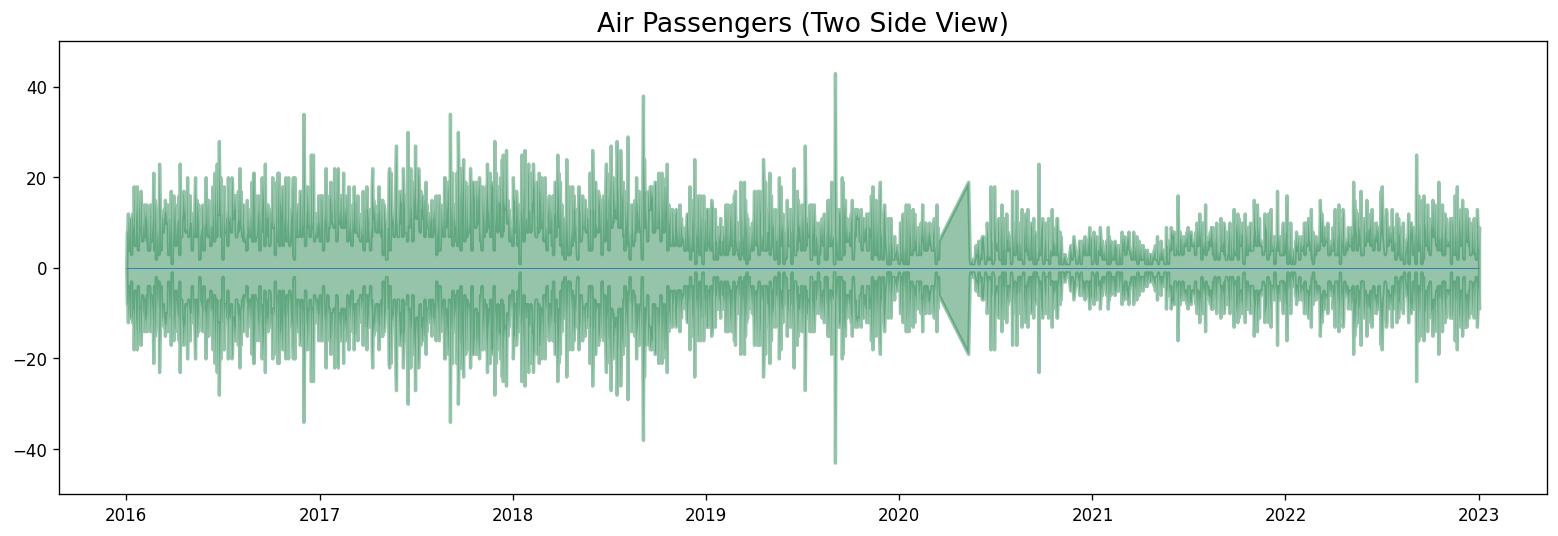

In [51]:
import numpy as np

x = df_count.index
y1 = df_count.objet

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-50, 50)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_count.index), xmax=np.max(df_count.index), linewidth=.5)
plt.show()

<AxesSubplot:xlabel='mois', ylabel='objet'>

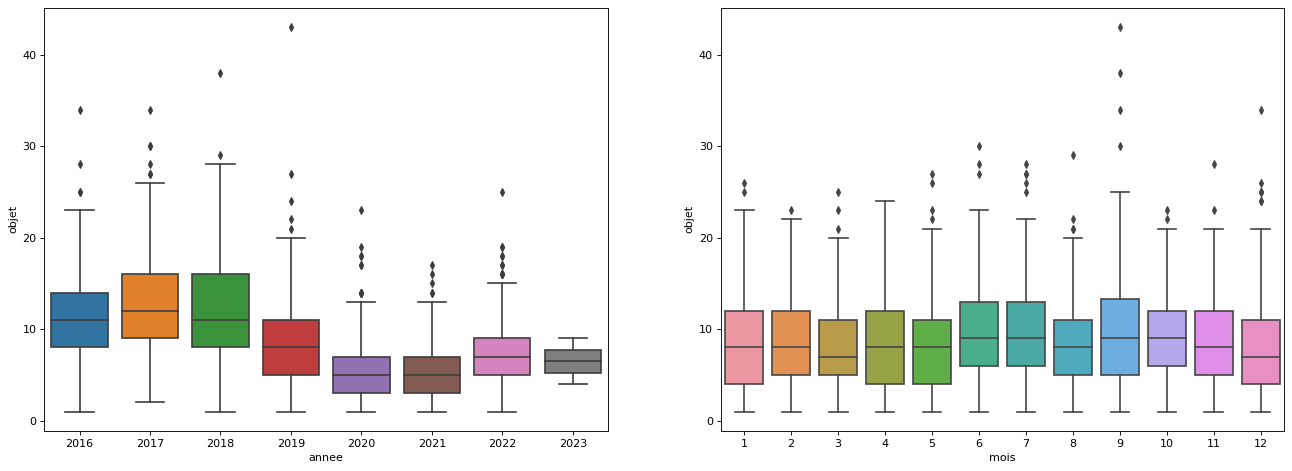

In [52]:
import seaborn as sns

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='annee', y='objet', data=df_count, ax=axes[0])
sns.boxplot(x='mois', y='objet', data=df_count)

## Est ce que la time-série est stationnaire?

In [53]:
# variance par année
[(yr, df_count[df_count.annee == yr].objet.var()) for yr in df_count.annee.unique()]

[(2016, 23.191443970357053),
 (2017, 27.464895378594004),
 (2018, 31.811259972903823),
 (2019, 25.137355594239562),
 (2020, 14.961960060777095),
 (2021, 8.13935357370723),
 (2022, 13.556890079617334),
 (2023, 12.5)]

In [54]:
# variance par mois
[(ms, df_count[df_count.mois == ms].objet.var()) for ms in df_count.mois.unique()]

[(1, 26.76036866359446),
 (2, 24.149031920460523),
 (3, 22.64900497512441),
 (4, 26.503134698944745),
 (5, 28.50248743718595),
 (6, 29.807979290391348),
 (7, 28.380281690140862),
 (8, 23.22161929371234),
 (9, 45.68968320327017),
 (10, 25.80564696590759),
 (11, 26.576062128825953),
 (12, 31.00272318257159)]

In [55]:
# variance par jour de semaine
[(jnom, df_count[df_count.jour_nom == jnom].objet.var()) for jnom in df_count.jour_nom.unique()]

[('Friday', 28.871233196181965),
 ('Saturday', 23.101323615648838),
 ('Sunday', 18.264613283137074),
 ('Monday', 36.561225607561454),
 ('Tuesday', 28.697273841465424),
 ('Wednesday', 23.74904766636852),
 ('Thursday', 32.130611920107995)]

In [56]:
df_count.objet.var()

28.606872019258166

La time serie a l'air d'être plutôt stationnaire

# Modèle ARIMA

In [57]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_count["objet"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_count["objet"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.854510328062081
p-value: 0.05089931794061018
Critial Values:
   1%, -3.433053943432798
Critial Values:
   5%, -2.8627345707126906
Critial Values:
   10%, -2.56740591915091

KPSS Statistic: 5.946658
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Jours

In [58]:
df_train = df_count["objet"][:df_count.shape[0]-60]
df_test = df_count["objet"][-60:]

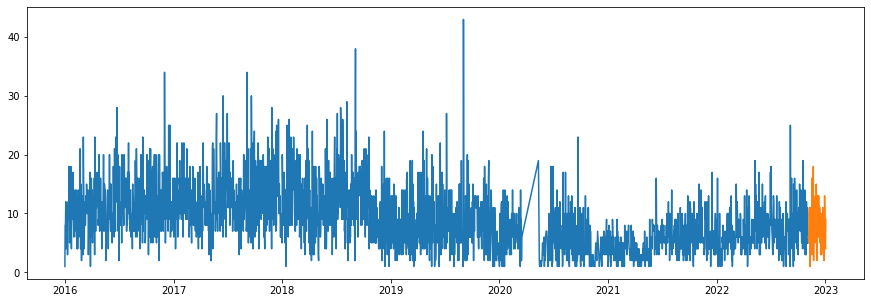

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_train.index, df_train)
ax.plot(df_test.index, df_test)

In [60]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=14004.899, Time=0.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18052.601, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15382.919, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=16795.365, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=14005.717, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=14005.577, Time=0.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=16253.116, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14876.851, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14004.344, Time=1.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=14000.574, Time=1.58 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=14001.587, Time=0.97 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=2.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=14000.218, Time=1.38 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=14001.451, Time=1.08 sec
 ARIMA(2,0,3)(0,0,0)[0] i

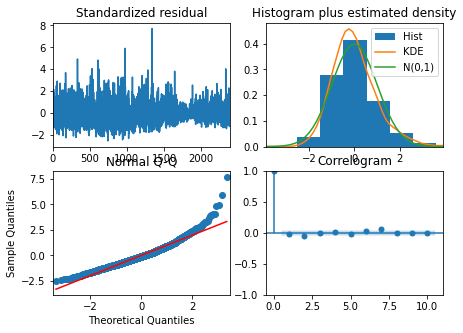

In [61]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [62]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.835197
p-value: 0.053419


In [63]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# # Original Series
# fig, axes = plt.subplots(3, 2, sharex=True)
# axes[0, 0].plot(df_train); axes[0, 0].set_title('Original Series')
# plot_acf(df_train, ax=axes[0, 1])

# # 1st Differencing
# axes[1, 0].plot(df_train.diff()); axes[1, 0].set_title('1st Order Differencing')
# plot_acf(df_train.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
# axes[2, 0].plot(df_train.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
# plot_acf(df_train.diff().diff().dropna(), ax=axes[2, 1])

In [64]:
# Forecast
TEST_SIZE = 60

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2389    7.273049
2390    8.705447
2391    7.261616
2392    8.456966
2393    7.705954
2394    7.901955
2395    8.261600
2396    7.439500
2397    8.548933
2398    7.363360
2399    8.407389
2400    7.679964
2401    7.977011
2402    8.136069
2403    7.572743
2404    8.414559
2405    7.457355
2406    8.350634
2407    7.673970
2408    8.023561
2409    8.042018
2410    7.677319
2411    8.301121
2412    7.541444
2413    8.291639
2414    7.681284
2415    8.048749
2416    7.973140
2417    7.757620
2418    8.206809
2419    7.614678
2420    8.233787
2421    7.696834
2422    8.058341
2423    7.924042
2424    7.817733
2425    8.129499
2426    7.676955
2427    8.179261
2428    7.716861
2429    8.056911
2430    7.890194
2431    7.861338
2432    8.066965
2433    7.728736
2434    8.129349
2435    7.738660
2436    8.048023
2437    7.867858
2438    7.891674
2439    8.017015
2440    7.770833
2441    8.084680
2442    7.760351
2443    8.034397
2444    7.854001
2445    7.911526
2446    7.977590
2447    7.8042

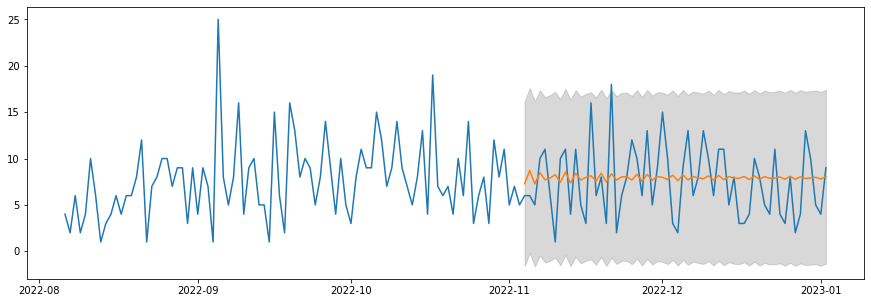

In [65]:
cf= pd.DataFrame(confint)

prediction_series = pd.Series(prediction.to_list(),index=df_test.index)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_count.objet[-150:])
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [66]:
compare = pd.DataFrame(df_test)
compare["pred"] = prediction.to_list()
compare

,objet,pred
date,,
2022-11-04,6,7.273049
2022-11-05,6,8.705447
2022-11-06,5,7.261616
2022-11-07,10,8.456966
2022-11-08,11,7.705954
2022-11-09,6,7.901955
2022-11-10,1,8.261600
2022-11-11,10,7.439500
2022-11-12,11,8.548933


In [67]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [68]:
MAPE(compare.objet, compare.pred)

73.15713716618491

In [69]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(compare.objet, compare.pred)*100

320.3546624220876

## Mois

In [70]:
df_count.columns

Index(['objet', 'annee', 'mois', 'semaine_num', 'jour_numero', 'jour_nom'], dtype='object')

In [71]:
df_count["yyyymm"] = df_count.index.strftime('%Y%m')

In [72]:
df_count_mois = df_count.groupby("yyyymm").agg("sum")["objet"]

<AxesSubplot:xlabel='yyyymm'>

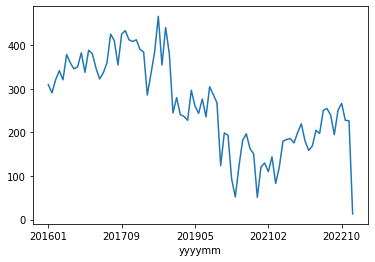

In [73]:
df_count_mois.plot()

In [74]:
df_count_mois.shape

(84,)

In [75]:
df_count_mois

yyyymm
201601    310
201602    291
201603    321
201604    342
201605    321
         ... 
202209    251
202210    267
202211    228
202212    227
202301     13
Name: objet, Length: 84, dtype: int64

In [76]:
df_train_mois = df_count_mois[:df_count_mois.shape[0]-6]
df_test_mois = df_count_mois[-6:]

In [77]:
df_test_mois

yyyymm
202208    195
202209    251
202210    267
202211    228
202212    227
202301     13
Name: objet, dtype: int64

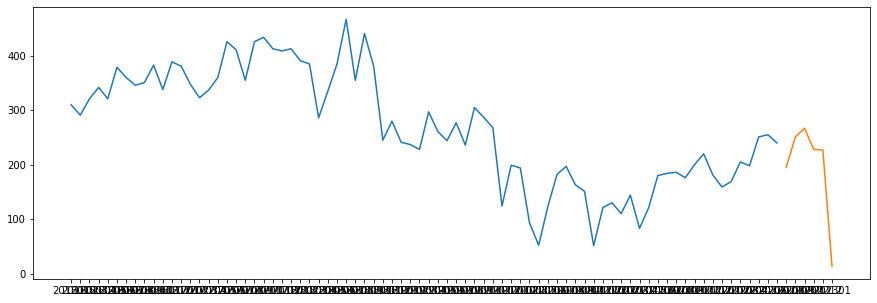

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_train_mois.index, df_train_mois)
ax.plot(df_test_mois.index, df_test_mois)

In [79]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(df_train_mois, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=818.855, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=823.943, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=821.568, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=819.126, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=821.969, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=820.795, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=820.785, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=818.958, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=820.554, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=822.790, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=817.069, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=817.188, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=819.602, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=818.998, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=818.9

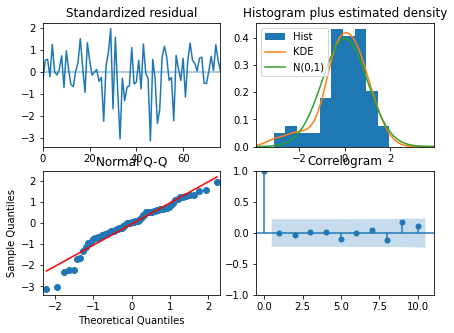

In [80]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [81]:
# Forecast
TEST_SIZE = 6

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


78    234.096167
79    231.893189
80    231.071162
81    230.764428
82    230.649972
83    230.607263
dtype: float64

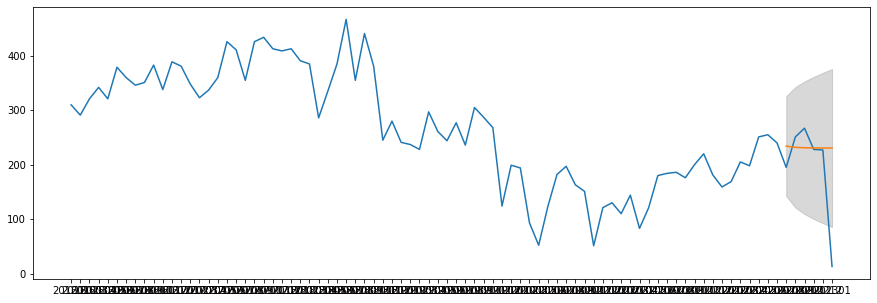

In [82]:
cf= pd.DataFrame(confint)

prediction_series = pd.Series(prediction.to_list(),index=df_test_mois.index)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(df_count_mois)
ax.plot(prediction_series)
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.3)


In [83]:
compare = pd.DataFrame(df_test_mois)
compare["pred"] = prediction.to_list()
compare

,objet,pred
yyyymm,,
202208,195,234.096167
202209,251,231.893189
202210,267,231.071162
202211,228,230.764428
202212,227,230.649972
202301,13,230.607263


In [84]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

MAPE(compare.objet, compare.pred)


286.30674947644195

In [85]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(compare.objet, compare.pred)*100

5302.557981170253

## Semaine

In [86]:
df_count["yyyyss"] = df_count.annee.astype(str) + "-" + df_count.semaine_num.astype(str)
df_count.sort_values("yyyyss").groupby("yyyyss").agg("sum")["objet"]

yyyyss
2016-1     60
2016-10    74
2016-11    77
2016-12    64
2016-13    73
           ..
2022-7     43
2022-8     36
2022-9     37
2023-1      9
2023-52     4
Name: objet, Length: 362, dtype: int64

<AxesSubplot:xlabel='annee,mois,semaine_num'>

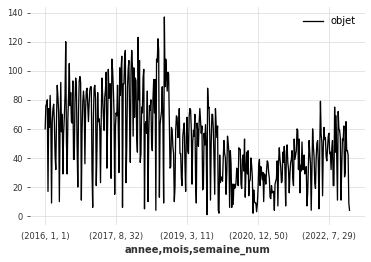

In [211]:
df_count.groupby(["annee", "mois", "semaine_num"]).agg("sum")[["objet"]].plot()

<AxesSubplot:xlabel='annee,mois,jour_nom'>

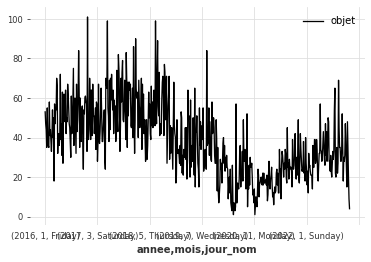

In [214]:
df_count.groupby(["annee", "mois", "jour_nom"]).agg("sum")[["objet"]].plot()


<AxesSubplot:xlabel='jour_nom'>

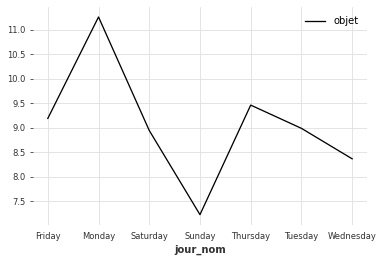

In [216]:
df_count.groupby(["jour_nom"]).agg("mean")[["objet"]].plot()


In [221]:
df_count.groupby(["jour_nom"]).agg("mean")[["objet"]].index.map({"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6})

Int64Index([4, 0, 5, 6, 3, 1, 2], dtype='int64', name='jour_nom')

In [ ]:
{"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}

<AxesSubplot:xlabel='nj'>

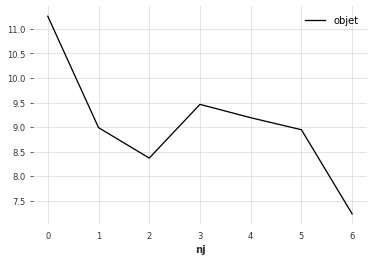

In [229]:
a = df_count.groupby(["jour_nom"]).agg("mean")[["objet"]]
a["nj"] = df_count.groupby(["jour_nom"]).agg("mean")[["objet"]].index.map({"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6})
a.set_index("nj").sort_values("nj").plot()

# XGBoost

## Jour

In [88]:
df_count

,objet,annee,mois,semaine_num,jour_numero,jour_nom,yyyymm,yyyyss
date,,,,,,,,
2016-01-01,1,2016,1,53,1,Friday,201601,2016-53
2016-01-02,8,2016,1,53,2,Saturday,201601,2016-53
2016-01-03,8,2016,1,53,3,Sunday,201601,2016-53
2016-01-04,12,2016,1,1,4,Monday,201601,2016-1
2016-01-05,4,2016,1,1,5,Tuesday,201601,2016-1
...,...,...,...,...,...,...,...,...
2022-12-29,13,2022,12,52,29,Thursday,202212,2022-52
2022-12-30,10,2022,12,52,30,Friday,202212,2022-52
2022-12-31,5,2022,12,52,31,Saturday,202212,2022-52


In [89]:
df_count.objet

date
2016-01-01     1
2016-01-02     8
2016-01-03     8
2016-01-04    12
2016-01-05     4
              ..
2022-12-29    13
2022-12-30    10
2022-12-31     5
2023-01-01     4
2023-01-02     9
Name: objet, Length: 2449, dtype: int64

In [90]:
# cnt = 0
# for i in X_train.index:
#     if i in X_test.index:
#         cnt+=1
# cnt

In [92]:
# First, let's split the time series into training and testing sets using TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

X = df_count["objet"]
y = df_count.objet

tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Next, let's import and initialize the XGBoost model
import xgboost as xgb

model = xgb.XGBRegressor()

# Now, let's fit the model to the training data
model.fit(X_train, y_train)

# And finally, let's make predictions on the test set and evaluate the model
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


6.2786052435579706e-09


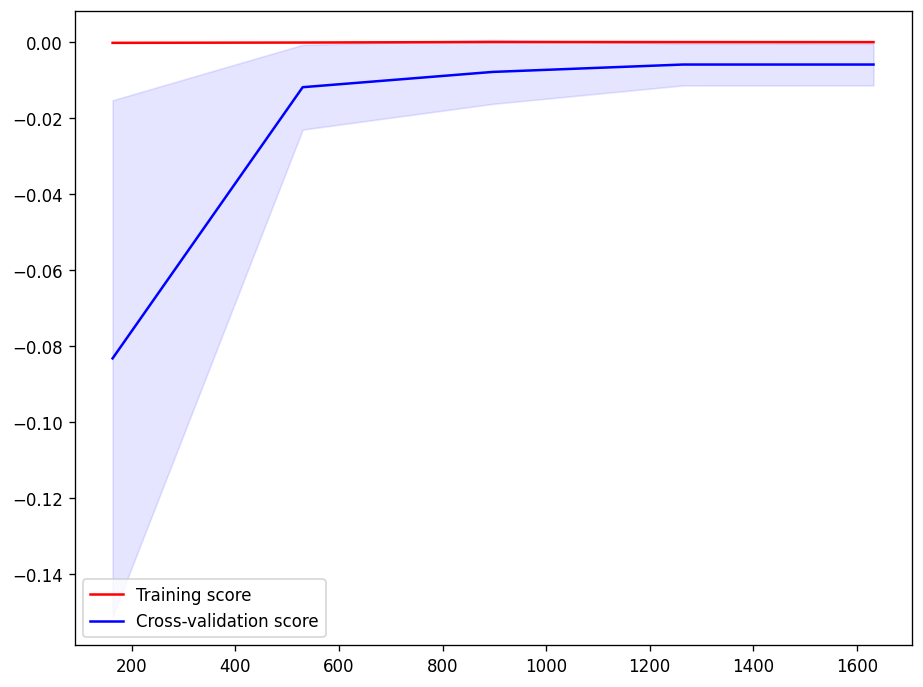

In [789]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean and standard deviation for the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='red', label='Training score')
plt.plot(train_sizes, test_mean, color='blue', label='Cross-validation score')

# Add the standard deviation lines
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='red', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='blue', alpha=0.1)

# Add a legend
plt.legend()

# Show the plot
plt.show()


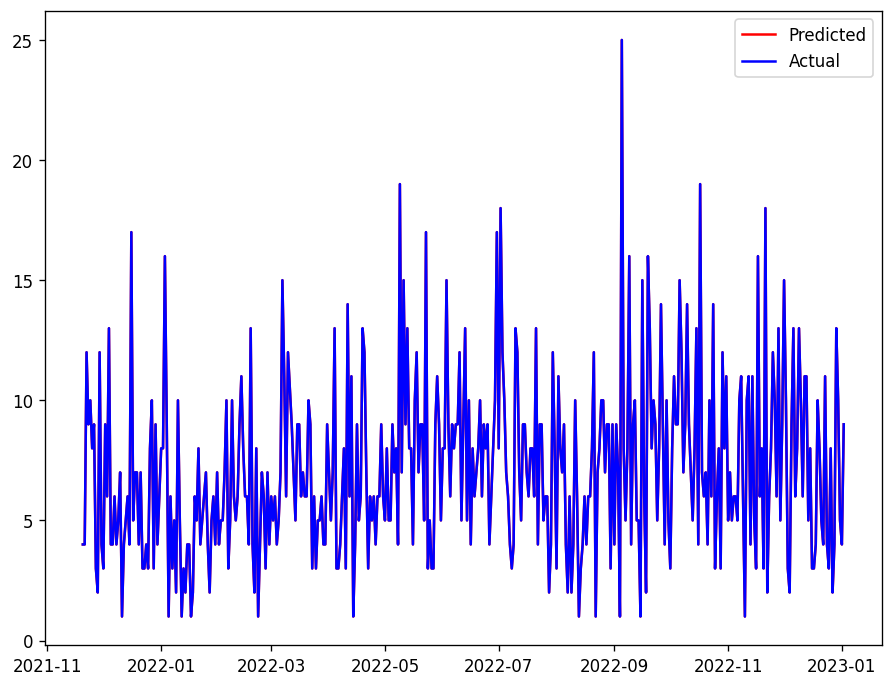

In [845]:
import matplotlib.pyplot as plt

# Convert the index to a list of dates
dates = y_test.index.tolist()

# Plot the predicted values
plt.plot(dates, y_pred, color='red', label='Predicted')

# Plot the actual values
plt.plot(dates, y_test, color='blue', label='Actual')

# Add a legend
plt.legend()

# Show the plot
plt.show()


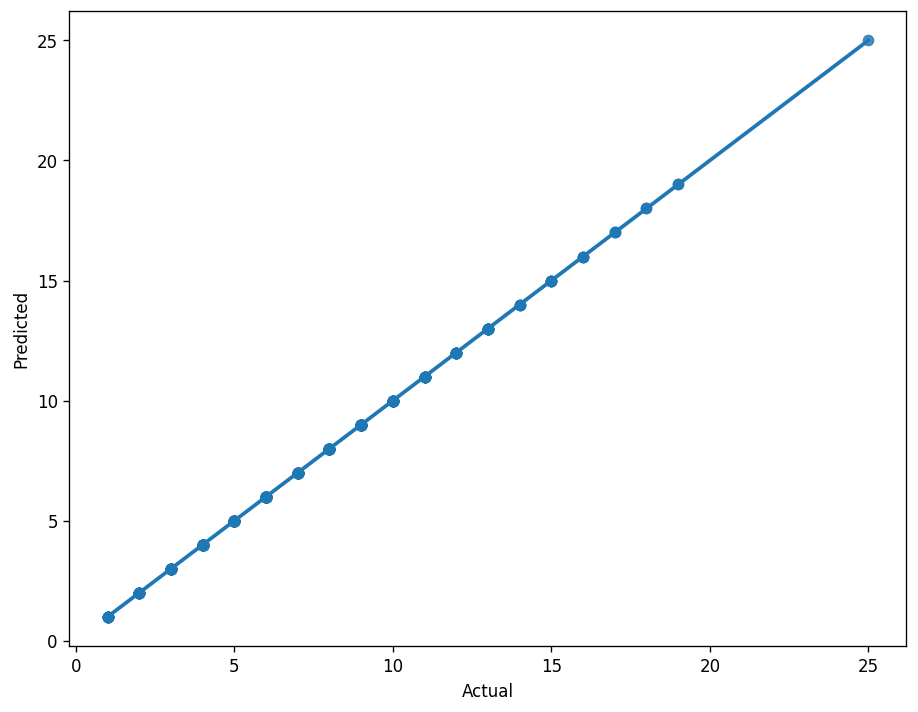

In [846]:
import seaborn as sns

# Create a dataframe with the actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual and predicted values
sns.regplot(x='Actual', y='Predicted', data=df)

# Show the plot
plt.show()

# Tensorflow

## Jour

In [847]:
import tensorflow 

# Convert the data to a 3D array
# X = df_count[["objet"]].values
# X = X.reshape((X.shape[0], X.shape[1], 1))

# Set the number of lags
n_lags = 5

# Create the LSTM model
model = tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.LSTM(units=100, input_shape=(n_lags, 1)))
model.add(tensorflow.keras.layers.Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error
new_y_pred = [i[0] for i in y_pred]
mae = np.mean(np.abs(new_y_pred - y_test))
print('MAE:', mae)


Epoch 1/100
64/64 [==============================] - 4s 15ms/step - loss: 85.8804 - val_loss: 24.0791
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 28.8647 - val_loss: 2.3584
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 7.4411 - val_loss: 1.8190
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 4.8236 - val_loss: 0.9735
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 3.3939 - val_loss: 0.4324
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 2.4583 - val_loss: 0.3349
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 1.9274 - val_loss: 0.2646
Epoch 8/100
64/64 [==============================] - 0s 7ms/step - loss: 1.5958 - val_loss: 0.2648
Epoch 9/100
64/64 [==============================] - 0s 7ms/step - loss: 1.3815 - val_loss: 0.2434
Epoch 10/100
64/64 [==============================] - 0s 7ms/step - loss: 1.2174 - val_loss: 0.2196
Epoch

In [848]:
len(dates)

408

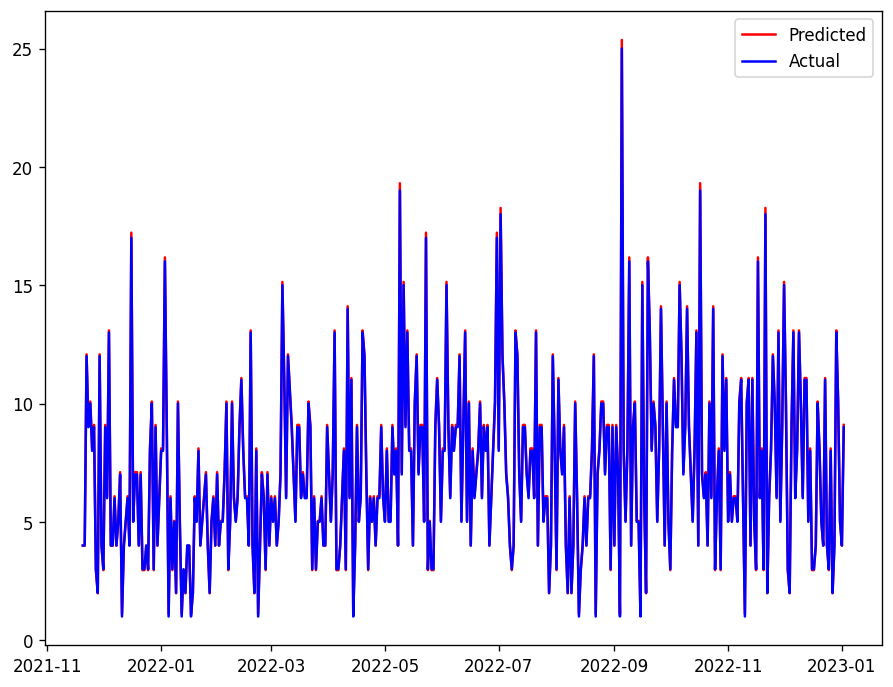

In [849]:
import matplotlib.pyplot as plt

# Convert the index to a list of dates
dates = y_test.index.tolist()

# Plot the predicted values
plt.plot(dates, new_y_pred, color='red', label='Predicted')

# Plot the actual values
plt.plot(dates, y_test, color='blue', label='Actual')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [850]:
pd.date_range(start='2023-01-06', end='2023-02-01', freq='D')



DatetimeIndex(['2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# model.predict(pd.date_range(start='2023-01-06', end='2023-02-01', freq='D'))

TypeError: Cannot convert the argument `type_value`: dtype('<M8[ns]') to a TensorFlow DType.

In [823]:
X_test

date
2021-11-20     4
2021-11-21     4
2021-11-22    12
2021-11-23     9
2021-11-24    10
              ..
2022-12-29    13
2022-12-30    10
2022-12-31     5
2023-01-01     4
2023-01-02     9
Name: objet, Length: 408, dtype: int64

# DARTS

In [105]:
df_count[["objet"]]

,objet
date,
2016-01-01,1
2016-01-02,8
2016-01-03,8
2016-01-04,12
2016-01-05,4
...,...
2022-12-29,13
2022-12-30,10
2022-12-31,5


In [104]:
from darts import TimeSeries

In [110]:
df_count.columns

Index(['objet', 'annee', 'mois', 'semaine_num', 'jour_numero', 'jour_nom',
       'yyyymm', 'yyyyss'],
      dtype='object')

In [113]:
df_count["date"] = df_count.index
df_count

,objet,annee,mois,semaine_num,jour_numero,jour_nom,yyyymm,yyyyss,date
date,,,,,,,,,
2016-01-01,1,2016,1,53,1,Friday,201601,2016-53,2016-01-01
2016-01-02,8,2016,1,53,2,Saturday,201601,2016-53,2016-01-02
2016-01-03,8,2016,1,53,3,Sunday,201601,2016-53,2016-01-03
2016-01-04,12,2016,1,1,4,Monday,201601,2016-1,2016-01-04
2016-01-05,4,2016,1,1,5,Tuesday,201601,2016-1,2016-01-05
...,...,...,...,...,...,...,...,...,...
2022-12-29,13,2022,12,52,29,Thursday,202212,2022-52,2022-12-29
2022-12-30,10,2022,12,52,30,Friday,202212,2022-52,2022-12-30
2022-12-31,5,2022,12,52,31,Saturday,202212,2022-52,2022-12-31


In [151]:
series = TimeSeries.from_dataframe(df_count, "date", "objet", fill_missing_dates=True, freq="D", fillna_value=0)
series

<TimeSeries (DataArray) (date: 2559, component: 1, sample: 1)>
array([[[1.]],

       [[8.]],

       [[8.]],

       ...,

       [[5.]],

       [[4.]],

       [[9.]]])
Coordinates:
  * date       (date) datetime64[ns] 2016-01-01 2016-01-02 ... 2023-01-02
  * component  (component) object 'objet'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [152]:
# train, val = series[:-60], series[-60:]
train, val = series.split_before(pd.Timestamp('2022-12-15'))

ExponentialSmoothing

In [153]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

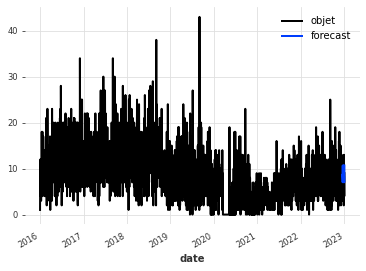

In [157]:
import matplotlib.pyplot as plt

series.plot("actual")
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

AutoARIMA

In [156]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

Backtesting

In [159]:
from darts.models import Prophet

models = [ExponentialSmoothing(), Prophet()]

backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=60)
             for model in models]

11:23:45 - cmdstanpy - INFO - Chain [1] start processing
11:23:45 - cmdstanpy - INFO - Chain [1] done processing
11:23:46 - cmdstanpy - INFO - Chain [1] start processing
11:23:46 - cmdstanpy - INFO - Chain [1] done processing
11:23:47 - cmdstanpy - INFO - Chain [1] start processing
11:23:47 - cmdstanpy - INFO - Chain [1] done processing
11:23:47 - cmdstanpy - INFO - Chain [1] start processing
11:23:48 - cmdstanpy - INFO - Chain [1] done processing
11:23:48 - cmdstanpy - INFO - Chain [1] start processing
11:23:48 - cmdstanpy - INFO - Chain [1] done processing
11:23:49 - cmdstanpy - INFO - Chain [1] start processing
11:23:49 - cmdstanpy - INFO - Chain [1] done processing
11:23:50 - cmdstanpy - INFO - Chain [1] start processing
11:23:50 - cmdstanpy - INFO - Chain [1] done processing
11:23:51 - cmdstanpy - INFO - Chain [1] start processing
11:23:51 - cmdstanpy - INFO - Chain [1] done processing
11:23:52 - cmdstanpy - INFO - Chain [1] start processing
11:23:52 - cmdstanpy - INFO - Chain [1]

KeyboardInterrupt: 

In [ ]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()

# Prophet

In [161]:
import pandas as pd
from prophet import Prophet

In [162]:
df_count

,objet,annee,mois,semaine_num,jour_numero,jour_nom,yyyymm,yyyyss,date
date,,,,,,,,,
2016-01-01,1,2016,1,53,1,Friday,201601,2016-53,2016-01-01
2016-01-02,8,2016,1,53,2,Saturday,201601,2016-53,2016-01-02
2016-01-03,8,2016,1,53,3,Sunday,201601,2016-53,2016-01-03
2016-01-04,12,2016,1,1,4,Monday,201601,2016-1,2016-01-04
2016-01-05,4,2016,1,1,5,Tuesday,201601,2016-1,2016-01-05
...,...,...,...,...,...,...,...,...,...
2022-12-29,13,2022,12,52,29,Thursday,202212,2022-52,2022-12-29
2022-12-30,10,2022,12,52,30,Friday,202212,2022-52,2022-12-30
2022-12-31,5,2022,12,52,31,Saturday,202212,2022-52,2022-12-31


In [172]:
df_prophet = df_count[["date", "objet"]]
df_prophet = df_prophet.rename(columns={"date": "ds", "objet": "y"})
df_prophet

,ds,y
date,,
2016-01-01,2016-01-01,1
2016-01-02,2016-01-02,8
2016-01-03,2016-01-03,8
2016-01-04,2016-01-04,12
2016-01-05,2016-01-05,4
...,...,...
2022-12-29,2022-12-29,13
2022-12-30,2022-12-30,10
2022-12-31,2022-12-31,5


In [173]:
m = Prophet()
m.fit(df_prophet)

11:48:36 - cmdstanpy - INFO - Chain [1] start processing
11:48:36 - cmdstanpy - INFO - Chain [1] done processing


In [194]:
future = m.make_future_dataframe(periods=1095)
future.tail()

,ds
3539,2025-12-28
3540,2025-12-29
3541,2025-12-30
3542,2025-12-31
3543,2026-01-01


In [195]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3539,2025-12-28,10.026614,3.423653,16.377764
3540,2025-12-29,14.141861,7.277015,20.105271
3541,2025-12-30,11.784267,5.491416,18.478615
3542,2025-12-31,11.161220,4.421769,17.664823
3543,2026-01-01,12.335468,5.625852,18.625223


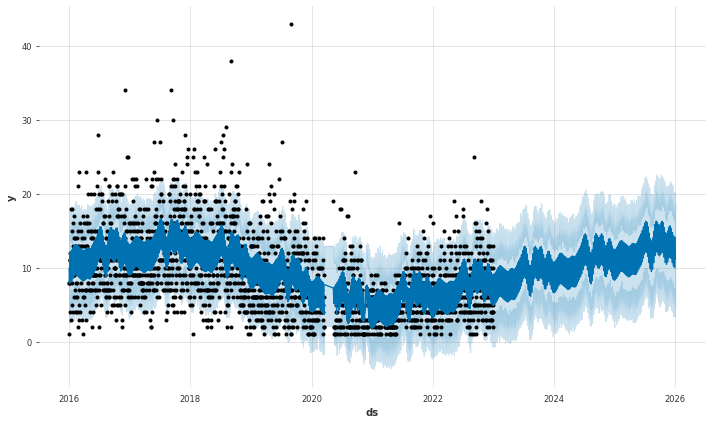

In [196]:
fig1 = m.plot(forecast)

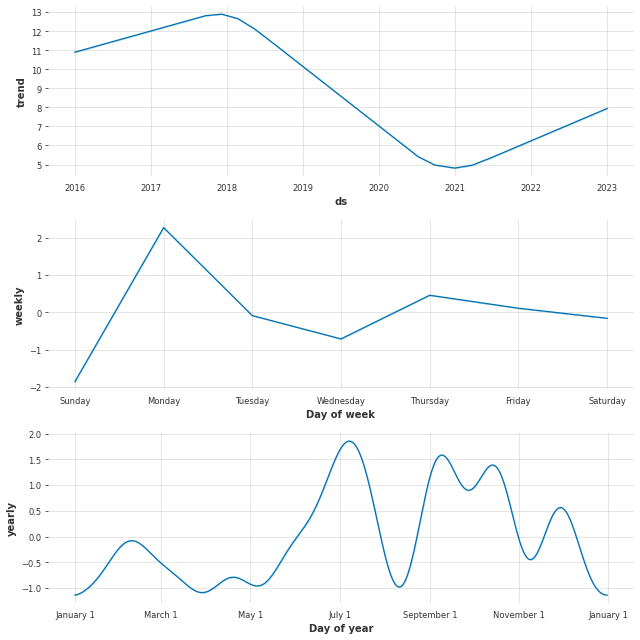

In [181]:
fig2 = m.plot_components(forecast)

In [182]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [183]:
plot_components_plotly(m, forecast)


c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\plotly\io\_json.py:469: UserWarning:

Discarding nonzero nanoseconds in conversion.



# Autre

In [201]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_count.objet.values, order=(3,0,3))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Apprenant\anaconda3\envs\ml\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2449
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7164.565
Date:                Fri, 06 Jan 2023   AIC                          14345.131
Time:                        13:21:57   BIC                          14391.558
Sample:                             0   HQIC                         14362.004
                               - 2449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0478      1.725      5.245      0.000       5.667      12.429
ar.L1         -0.1830      0.385     -0.475      0.635      -0.937       0.571
ar.L2          0.3716      0.242      1.532      0.1

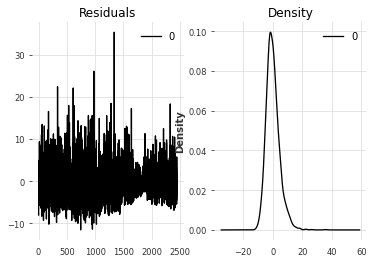

In [202]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()